In [3]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df = df[df['job_title_short'] == 'Data Analyst']


In [11]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

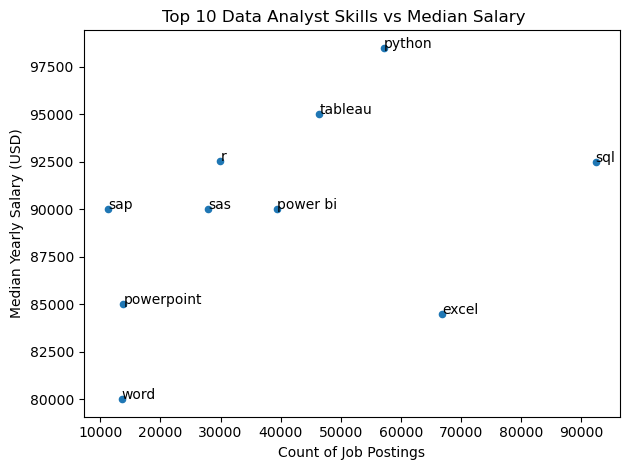

: 

In [ ]:
skill_stats.plot(kind = 'scatter', x='skill_count', y='median_salary', title='Top 10 Data Analyst Skills vs Median Salary   ')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index): 
    plt.text(skill_stats['skill_count'].iloc[i],
             skill_stats['median_salary'].iloc[i],
             txt)

plt.show()
